# This notebook gives examples of how to use the recalibrated Hipparcos 2 data presented in Brandt et al. 2022.

## In Brandt et al. 2022 we show that a lightly recalibrated Hipparcos 2 provides significantly better agreement with Gaia EDR3. To keep the datasets simple, we never explicitly provide the recalibrated IAD files.
## Instead, htof provides a class that reads in the Java Tool hip2 data, recalibrates it, and perform all the same htof functionality on said data. You *must* use the Java tool IAD for the recalibration!
## If you want a recalibrated IAD file (meaning, you want to use your own code in lieu of HTOF), then this class can write out the recalibrated data in *exactly the same format* as the input java tool data.

## This notebook provides examples of how to do all of the above.

# Example 1: loading in Java Tool data and recalibrating it. Showing the recalibrated parameters and errors for beta pic.
The syntax here is exactly the same as for the other Parser() classes. You just need to import Hipparcos2Recalibrated from htof.special_parse

In [1]:
from htof.special_parse import Hipparcos2Recalibrated
data = Hipparcos2Recalibrated()
data.parse(star_id='027321', intermediate_data_directory='htof/test/data_for_tests/Hip21')
# a special recalibrated_header that belongs only to the Hipparcos2Recalibrated class. All the standard astrometric
# parameters and errors are contained in here, as well as hte updated NRES, NOB, and F2 values.
# note that the new F2 is -inf for beta pic!! This is not a bug. See the paper for a discussion on this.
print('The recalibrated astrometric parameters and errors: \n')
print(data.recalibrated_header)

The recalibrated astrometric parameters and errors: 

{'first': {'HIP': 27321.0, 'MCE': 27251.0, 'NRES': 111, 'NC': 1.0, 'isol_n': 5.0, 'SCE': 0.0, 'F2': -inf, 'F1': 0}, 'second': {'Hp': 3.9077, 'B-V': 0.171, 'VarAnn': 0.0, 'NOB': 111, 'NR': 0}, 'third': {'RAdeg': 86.83348853, 'DEdeg': -51.07399104, 'Plx': 51.41, 'pm_RA': 4.7, 'pm_DE': 83.11, 'e_RA': 0.3, 'e_DE': 0.34, 'e_Plx': 0.35, 'e_pmRA': 0.34, 'e_pmDE': 0.45, 'dpmRA': nan, 'dpmDE': nan, 'e_dpmRA': nan, 'e_dpmDE': nan, 'ddpmRA': nan, 'ddpmDE': nan, 'e_ddpmRA': nan, 'e_ddpmDE': nan, 'upsRA': nan, 'upsDE': nan, 'e_upsRA': nan, 'e_upsDE': nan, 'var': nan}}


## Example 1.1: Recalibrating the data using the Astrometry() wrapper class.
Results in identically recalibrated data as in example 1, but accesses the above parser through the Astrometry() wrapper.

In [2]:
from htof.main import Astrometry
astro = Astrometry('Hip2recalibrated', '27321', 'htof/test/data_for_tests/Hip21', 
                   central_epoch_ra=1991.25,
                   central_epoch_dec=1991.25, format='jyear', fit_degree=1,
                   use_parallax=False)
# a special recalibrated_header that belongs only to the Hipparcos2Recalibrated class. All the standard astrometric
# parameters and errors are contained in here, as well as hte updated NRES, NOB, and F2 values.
# note that the new F2 is -inf for beta pic!! This is not a bug. See the paper for a discussion on this.
data = astro.data
print('The recalibrated astrometric parameters and errors: \n')
print(data.recalibrated_header)
print(' \n And htof will automatically print this usage disclaimer to you when you use the recalibrated data:')

The recalibrated astrometric parameters and errors: 

{'first': {'HIP': 27321.0, 'MCE': 27251.0, 'NRES': 111, 'NC': 1.0, 'isol_n': 5.0, 'SCE': 0.0, 'F2': -inf, 'F1': 0}, 'second': {'Hp': 3.9077, 'B-V': 0.171, 'VarAnn': 0.0, 'NOB': 111, 'NR': 0}, 'third': {'RAdeg': 86.83348853, 'DEdeg': -51.07399104, 'Plx': 51.41, 'pm_RA': 4.7, 'pm_DE': 83.11, 'e_RA': 0.3, 'e_DE': 0.34, 'e_Plx': 0.35, 'e_pmRA': 0.34, 'e_pmDE': 0.45, 'dpmRA': nan, 'dpmDE': nan, 'e_dpmRA': nan, 'e_dpmDE': nan, 'ddpmRA': nan, 'ddpmDE': nan, 'e_ddpmRA': nan, 'e_ddpmDE': nan, 'upsRA': nan, 'upsDE': nan, 'e_upsRA': nan, 'e_upsDE': nan, 'var': nan}}
 
 And htof will automatically print this usage disclaimer to you when you use the recalibrated data:


/home/gmbrandt/Documents/Repositories/HTOF/htof/main.py:42: UserWarning: You have selected Hip2recalibrated, the recalibrated Hipparcos 2 data. Note that for this, you should be feeding in the filepaths to the Hip21 (Hip2 java tool data), because htof applies the recalibration on-the-fly for each file. As well, be sure to read Brandt et al. 2022 to understand the limitations of using the recalibrated data. 
  warnings.warn(f'You have selected {data_choice}, the recalibrated Hipparcos 2 data. Note that for this,'


# Example 2: writing out those data in a new IAD file. 

In [3]:
data.write_as_javatool_format('hip27321_recalibrated.d')
# other file extensions work as well (like that below), but .d is preferred because the input java tool IAD data have that extension.
#data.write_as_javatool_format('hip27321_recalibrated.txt')

## Disclaimer with example 2: Because you can write out the recalibrated IAD (hip27321_recalibrated.d in this example) in the exact same format as the input data, you could in practice accidentally load in hip27321_recalibrated.d using the Hipparcos2Recalibrated() class. But don't do this. This will double apply the correction.

# Example 3: recreating the residuals figure from Brandt et al. 2022. 

In [4]:
from htof.parse import HipparcosRereductionJavaTool
import numpy as np

# a handful of bright stars (all 3.9th mag in HpMag)
stars = ['27321', '18907', '43023', '45101', '56211', '83207']
# grab the recalibrated residuals
residuals_all_recalibrated = []
epoch_all_rec = []
for star in stars:
    data = Hipparcos2Recalibrated()
    data.parse(star_id=star, intermediate_data_directory='htof/test/data_for_tests/Hip21')
    residuals_all_recalibrated.extend(data.residuals.values)
    epoch_all_rec.extend(data._epoch.values)

# grab the normal 2007 as-is residuals
residuals_all = []
epoch_all = []
for star in stars:
    data = HipparcosRereductionJavaTool()
    data.parse(star_id=star, intermediate_data_directory='htof/test/data_for_tests/Hip21')
    residuals_all.extend(data.residuals.values)
    epoch_all.extend(data._epoch.values)

# arrify them for plotting
residuals_all_recalibrated = np.array(residuals_all_recalibrated).flatten()
residuals_all = np.array(residuals_all).flatten()
epoch_all = np.array(epoch_all).flatten()
epoch_all_rec = np.array(epoch_all_rec).flatten()

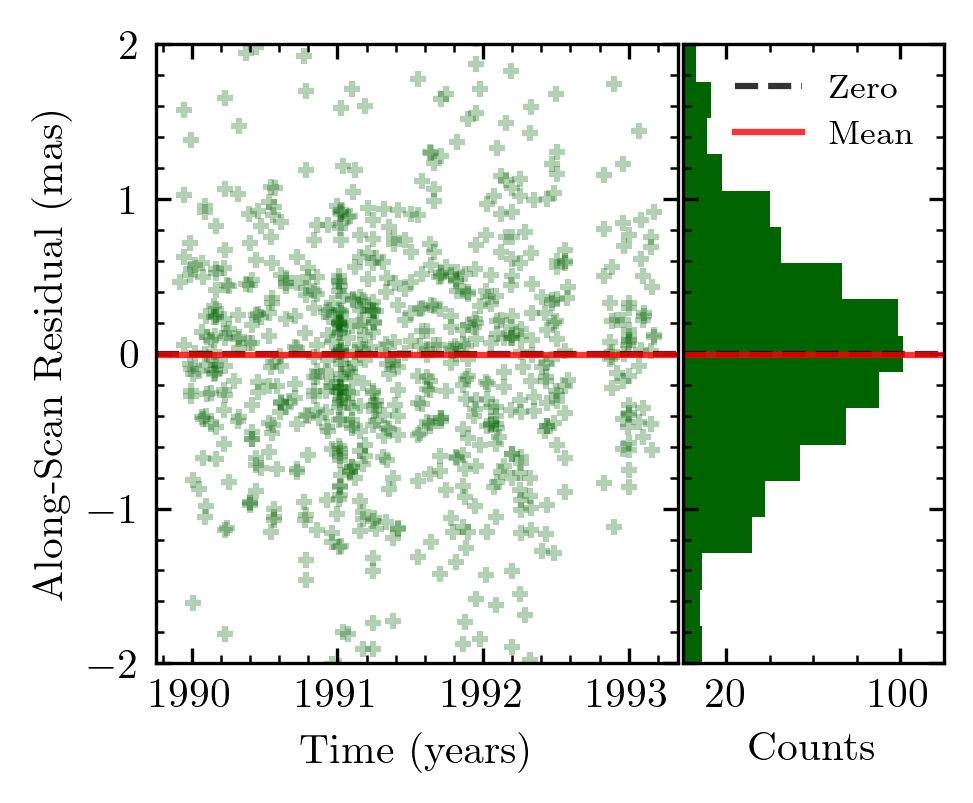

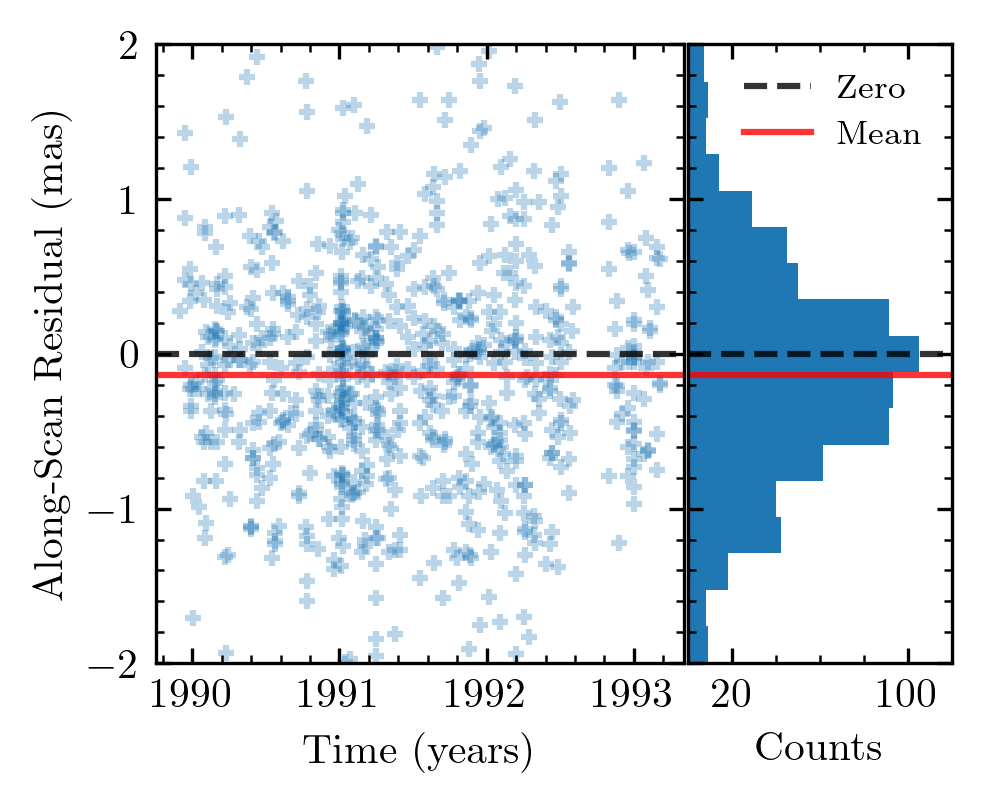

In [5]:
import os
import matplotlib.pyplot as plt

# load in the nice plotting style (courtesy of the MESA stellar evolution team), if it exists:
pltstyle = '/home/gmbrandt/Documents/papers/mesa.mplstyle'
if os.path.exists(pltstyle):
    plt.style.use(pltstyle)

for color, case_name, residuals, epochs in zip(['#006400', 'C0'], ['recalibrated', '2007'], [residuals_all_recalibrated, residuals_all], 
                                        [epoch_all_rec, epoch_all]):
    fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 1]})
    axes[0].scatter(epochs, residuals, marker='+', alpha=0.3, color=color)
    bins = np.linspace(-3.4, 3.4, 30)
    axes[1].hist(residuals, bins=bins, orientation='horizontal', color=color)
    axes[0].axhline(y=0, ls='--', color='k', alpha=0.8)
    axes[1].axhline(y=0, ls='--', color='k', label='Zero', alpha=0.8)
    
    mean = np.mean(residuals)
    axes[0].axhline(y=mean, ls='-', color='red', alpha=0.8)
    axes[1].axhline(y=mean, ls='-', color='red', alpha=0.8, label='Mean')
    #axes[1].set_yticks([])
    plt.tight_layout()
    pos1 = axes[1].get_position() # get the original position 
    pos2 = [pos1.x0 - 0.05, pos1.y0, pos1.width, pos1.height] 
    axes[1].set_position(pos2) # set a new position
    axes[0].set_ylabel('Along-Scan Residual (mas)')
    axes[0].set_xlabel('Time (years)')
    axes[1].set_xticks([20, 100])
    axes[1].set_xlabel('Counts')
    #sigma = np.std(residuals[np.abs(residuals) < 2])
    #axes[1].annotate(r'$\sigma$='+ '{:.2f}'.format(sigma), xy=(0.2, 0.52), xycoords='axes fraction')
    # fixed limits
    axes[1].set_xlim((0, 120))
    axes[1].set_ylim((-2, 2))
    #
    axes[1].legend(loc='best')
    plt.savefig(f'{case_name}_residuals_plot.png', dpi=600)
    plt.show()

## The residual offset of -0.12 mas is clearly visible even just over these 5 stars. But, it is resolved in the recalibrated dataset.

## Example 4: Residual offset in 7 and 9 parameter sources. 
For this example, you need to have the full directory of the Java tool IAD downloaded (available here https://www.cosmos.esa.int/web/hipparcos/hipparcos-2 at the time of writing; this is a 350 mb zip file), and the full hipparcos catalog downloaded (the vizier version is fine, because we are just using it to find the solution type of stars).

In [6]:
from htof.validation.utils import load_hip2_catalog
import os

catalog_path = '/home/gmbrandt/Documents/hip2_vizier_maincat.dat'
resrec_javatool_path = '/home/gmbrandt/Documents/ResRec_JavaTool_2014_sep3_2021'

if not os.path.exists(catalog_path) or not os.path.exists(resrec_javatool_path):
    raise ValueError('Change the paths!')

cat = load_hip2_catalog(catalog_path)
seven_or_nine = np.logical_or(cat['soltype'] == 7, cat['soltype'] == 9)
cat = cat[seven_or_nine]
print(len(cat), ' sources found, there should be about 1300 of them.')

1312  sources found, there should be about 1300 of them.


This next cell will take some about 20 minutes to run.

In [16]:
import warnings

ignore_list = [21763, 33977, 35904, 56561, 61622, 65474, 110609, 112122]  # ones that have to be ad-hoc corrected.
stars = [i for i in cat['hip_id'] if i not in ignore_list]

# grab the recalibrated residuals
residuals_all_recalibrated = []
epoch_all_rec = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # ignore the disclaimers that print.
    for star in stars:
        data = Hipparcos2Recalibrated()
        data.parse(star_id=star, intermediate_data_directory=resrec_javatool_path)
        residuals_all_recalibrated.extend(data.residuals.values)
        epoch_all_rec.extend(data._epoch.values)

# grab the normal 2007 as-is residuals
residuals_all = []
epoch_all = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # ignore the disclaimers that print.
    for star in stars:
        data = HipparcosRereductionJavaTool()
        data.parse(star_id=star, intermediate_data_directory=resrec_javatool_path)
        residuals_all.extend(data.residuals.values)
        epoch_all.extend(data._epoch.values)

# arrify them for plotting
residuals_all_recalibrated = np.array(residuals_all_recalibrated).flatten()
residuals_all = np.array(residuals_all).flatten()
epoch_all = np.array(epoch_all).flatten()
epoch_all_rec = np.array(epoch_all_rec).flatten()

Now to make the same plot as we did for the 5 test stars, except now we are using 1300 stars that are all either 7 or 9 parameter fits.

[-1.24672263 -0.26658886 -1.6838258  ...  1.03115958  1.72095423
 -2.52367348]
[-1.31 -0.33 -1.75 ...  0.81  1.5  -2.76]
0.00247025479480638


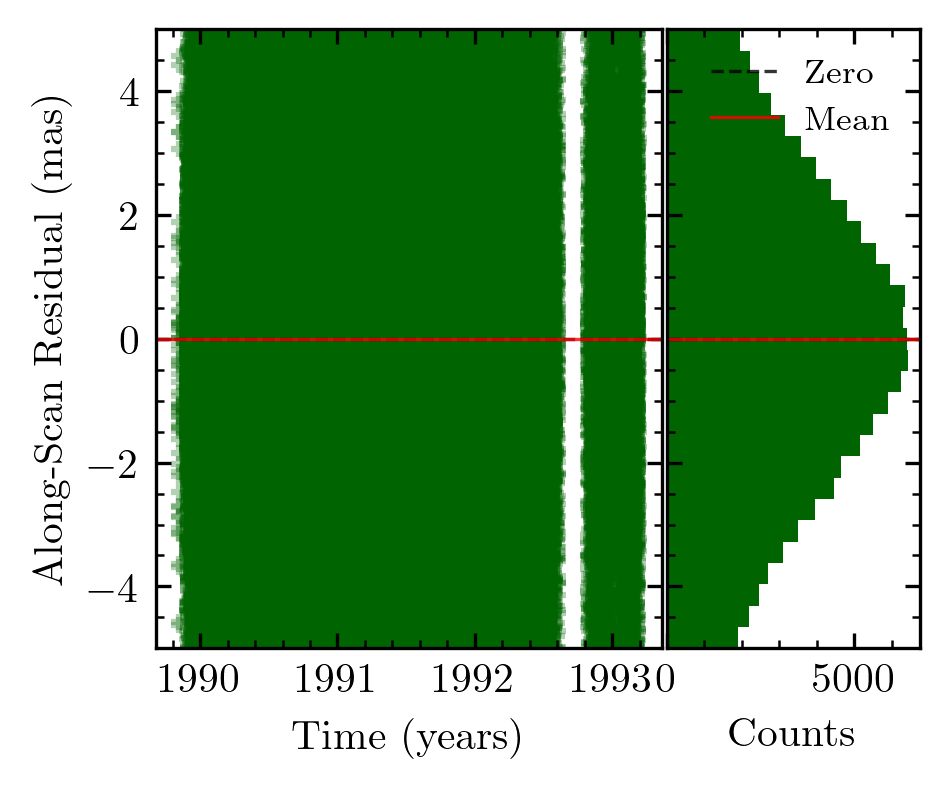

-0.10331191121942271


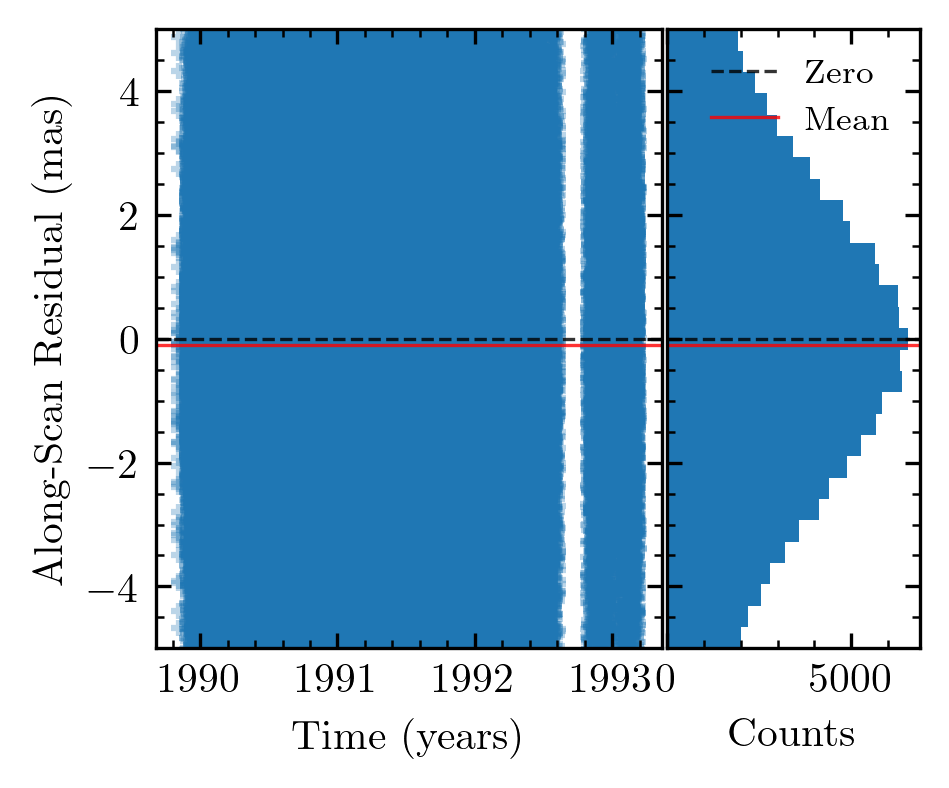

In [23]:
print(residuals_all_recalibrated)
print(residuals_all)
for color, case_name, residuals, epochs in zip(['#006400', 'C0'], ['recalibrated_7or9p', '2007_7or9p'], 
                                               [residuals_all_recalibrated, residuals_all], 
                                               [epoch_all_rec, epoch_all]):
    fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 1]})
    axes[0].scatter(epochs, residuals, marker='+', alpha=0.3, color=color)
    bins = np.linspace(-5, 5, 30)
    axes[1].hist(residuals, bins=bins, orientation='horizontal', color=color)
    axes[0].axhline(y=0, ls='--', color='k', alpha=0.8, lw=0.8)
    axes[1].axhline(y=0, ls='--', color='k', label='Zero', alpha=0.8, lw=0.8)
    
    mean = np.mean(residuals)
    print(mean)
    axes[0].axhline(y=mean, ls='-', color='red', alpha=0.8, lw=0.8)
    axes[1].axhline(y=mean, ls='-', color='red', alpha=0.8, label='Mean', lw=0.8)
    #axes[1].set_yticks([])
    plt.tight_layout()
    pos1 = axes[1].get_position() # get the original position 
    pos2 = [pos1.x0 - 0.05, pos1.y0, pos1.width, pos1.height] 
    axes[1].set_position(pos2) # set a new position
    axes[0].set_ylabel('Along-Scan Residual (mas)')
    axes[0].set_xlabel('Time (years)')
    #axes[1].set_xticks([20, 100])
    axes[1].set_xlabel('Counts')
    #sigma = np.std(residuals[np.abs(residuals) < 2])
    #axes[1].annotate(r'$\sigma$='+ '{:.2f}'.format(sigma), xy=(0.2, 0.52), xycoords='axes fraction')
    # fixed limits
    #axes[1].set_xlim((0, 120))
    axes[1].set_ylim((-5, 5))
    #
    axes[1].legend(loc='best')
    plt.savefig(f'{case_name}_residuals_plot.png', dpi=600)
    plt.show()

## The residual offset is about -0.1 mas, close to the -0.12 mas observed for the 5 parameter sources only (see Brandt et al. 2022). And the recalibrated values have a smaller offset (as they should). So even though the recalibration was designed withdata from 5 parameter sources, it works for 7 and 9 as well. 